In [42]:
#import sys
#!{sys.executable} -m pip install mplleaflet

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet 

In [43]:
# Visualize the location of the stations that collected the data

# Load data
station_data = pd.read_csv('BinSize_d400.csv')
hashid = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'

# Get the stations that collected the data stored in df
station_locations_by_hash = station_data[station_data['hash'] == hashid] 

# Get longitude and latitude and convert array into list
lon = station_locations_by_hash['LONGITUDE'].tolist()
lat = station_locations_by_hash['LATITUDE'].tolist()

# Create the plot
fig = plt.figure(figsize = (1,5))

plt.scatter(lon,lat, c = 'r', alpha = 0.7, s = 200)

# There's an easy to fix bug that returns the error 'XAxis' object has no attribute '_gridOnMajor'
# To fix it just replace _gridOnMajor with _major_tick_kw['gridOn'] in 
# anaconda3\Lib\site-packages\mplleaflet\mplexporter\utils.py
mplleaflet.display()


c:\Users\kevin\anaconda3\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
c:\Users\kevin\anaconda3\lib\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [44]:
# Import temperature data
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [45]:
# Multiply Data_value by 0.1 to get Celcius degrees since the og
# data is given in tenths of degrees Celcius
df['Data_Value'] = df['Data_Value'].apply(lambda x: x * 0.1)
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [46]:
# Get rid leap years since it makes the data easier to work with 
# and won't impact the vizualitation 
df.drop(df[df['Date'] == '2008-02-29'].index, inplace = True)
df.drop(df[df['Date'] == '2012-02-29'].index, inplace = True)

# Separate dates by day, month and year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.head()

,ID,Date,Element,Data_Value,Year,Month,Day
0,USW00094889,2014-11-12,TMAX,2.2,2014,11,12
1,USC00208972,2009-04-29,TMIN,5.6,2009,4,29
2,USC00200032,2008-05-26,TMAX,27.8,2008,5,26
3,USC00205563,2005-11-11,TMAX,13.9,2005,11,11
4,USC00200230,2014-02-27,TMAX,-10.6,2014,2,27


In [47]:
# Group min and max values by month and day for the period 2005-2014
max_5_14 = df[(df['Element'] == 'TMAX') & (df['Year'] >= 2005) & (df['Year'] < 2015)].groupby(
    ['Month', 'Day']).agg({'Data_Value': np.max})
min_5_14 = df[(df['Element'] == 'TMIN') & (df['Year'] >= 2005) & (df['Year'] < 2015)].groupby(
    ['Month', 'Day']).agg({'Data_Value': np.min})

# The same but for 2015
max_15 = df[(df['Element'] == 'TMAX') & (df['Year'] == 2015)].groupby(
    ['Month', 'Day']).agg({'Data_Value': np.max})
min_15 = df[(df['Element'] == 'TMIN') & (df['Year'] == 2015)].groupby(
    ['Month', 'Day']).agg({'Data_Value': np.min})

# Check the output to make sure it's doing what I want
max_15.head()

Data_Value
Month Day            
1     1           1.1
      2           3.9
      3           3.9
      4           4.4
      5           2.8

In [53]:
# Check for places where the 2015 data broke the min and max records
# for the past years considered
# The [0] returns list of indices of condition-meeting cells
broke_max = np.where(max_15['Data_Value'] > max_5_14['Data_Value'])[0] 
broke_min = np.where(min_15['Data_Value'] < min_5_14['Data_Value'])[0]


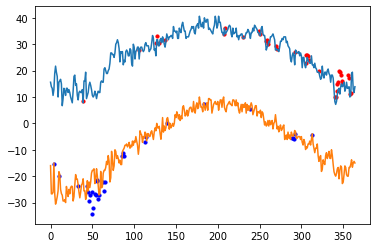

In [55]:
# Create basic plot to check that everything looks good
plt.figure()

plt.plot(max_5_14.values)
plt.plot(min_5_14.values)

plt.scatter(broke_max, max_15.iloc[broke_max], s = 10, color = 'r')
plt.scatter(broke_min, min_15.iloc[broke_min], s = 10, color = 'b')

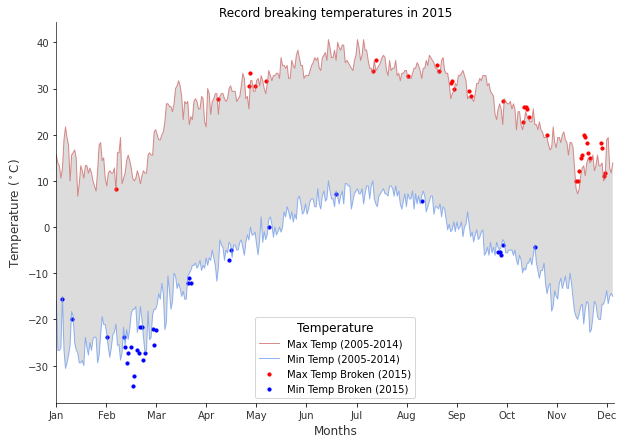

In [99]:
# Improve plot
plt.figure(figsize = (10,7))

plt.title('Record breaking temperatures in 2015', fontsize = 12)

plt.plot(max_5_14.values, label = 'Max Temp (2005-2014)', linewidth = 1, alpha = 0.7, c = 'indianred')
plt.plot(min_5_14.values, label = 'Min Temp (2005-2014)', linewidth = 1, alpha = 0.7, c = 'cornflowerblue')

plt.gca().fill_between(range(len(max_5_14)), min_5_14['Data_Value'], max_5_14['Data_Value'], facecolor = 'gainsboro')

plt.scatter(broke_max, max_15.iloc[broke_max], s = 10, color = 'r', label = 'Max Temp Broken (2015)')
plt.scatter(broke_min, min_15.iloc[broke_min], s = 10, color = 'b', label = 'Min Temp Broken (2015)')

plt.legend(loc = 'best', title = 'Temperature', fontsize = 10).get_title().set_fontsize('12')

# Add proper labelling to axes
plt.xticks(np.linspace(0,30 + 30*11, num = 12), (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'Jun', r'Jul', r'Aug',
r'Sep', r'Oct', r'Nov', r'Dec'), alpha = 0.8)
plt.xlim(0,365)
plt.xlabel('Months', fontsize = 12, alpha = 0.8)

plt.yticks(alpha = 0.8)
plt.ylabel('Temperature ($^\circ$C)', fontsize = 12, alpha = 0.8)

# Get rid of top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_alpha(alpha = 0.8)
plt.gca().spines['bottom'].set_alpha(alpha = 0.8)

plt.show()

In [1]:
conda update -n base -c defaults conda

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\kevin\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39haa95532_0         923 KB
    conda-package-handling-1.8.1|   py39h8cc25b3_0         729 KB
    conda-repo-cli-1.0.5       |   py39haa95532_0         122 KB
    pathlib-1.0.1              |     pyhd3eb1b0_1          17 KB
    pyjwt-2.4.0                |   py39haa95532_0          38 KB
    sqlparse-0.4.1             |             py_0          35 KB
    ------------------------------------------------------------
                                           Total:         1.8 MB

The following NEW packages will be INSTALLED:

  pathlib            pkgs/main/noarch::pathlib-1.0.1-pyhd3eb1b0_1

The